## CS 530 – Final take home exam  (20 points)
## Due: Sunday, May 24 at 11:59am
     ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
**This exam is individual and—unlike the final project—is therefore meant to be taken alone rather than in a group. Please write your name below to certify that you have worked on this exam by yourself and the code written in this exam as well as all the text explaining your results is yours and yours alone or code that you yourself have found only legitimately and in the public domain on the internet. You have not discussed this exam with anyone else and certainly have not used code, text, or other information from anyone in any part of the exam below. You have also not shared any code or text that you have written with anyone else.<br>
Your name: _____________________________________________________ <br>**


Make sure you submit your zipped file (Jupyter notebook + CSV file) to Canvas after you finish this exam (do not attach the dataset). In addition, we strongly encourage you to do all of the following to minimize loss of points of this exam:
<li>   Double check and make sure that all your code blocks runs smoothly. This should be the very last thing you do before submitting. If you then change just one little thing in the code, check again that it all runs well before submitting. Submitting code that does not run will be highly detrimental for your grade.
<li>   The Jupyter notebook should be readable, well designed and styled. It should look like a report to solve an important problem (not something put together hastily and haphazardly). Clean up your block outputs. Do not leave anything that might be confusing for the reader. In this exam, just like in real life, if your report is confusing to the reader, that is on you and not on the reader. One way to achieve this is to finish the exam well in advance of the deadline, go do something else for a day or two, and then read your submission carefully again. You will typically find that many things that were supposedly clear to you when you read the submission just after finishing writing it all no longer make sense when you read it a few days later. Naturally, if it is not clear to you a few days later, it would not be clear to any other reader too. This will give you a chance to modify your submission before finally submitting it.

     
     ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




**In the questions below, make sure to use the appropriate goodness of fit measures in your discussion (R^2, adjusted R^2, AIC, BIC, accuracy, ROC AUC, ...). When you carry out any improvements you think you can make to the machine-learning models you build, you should explain whether they work, and—importantly—why. Visualizing the dataset and plotting various graphs as discussed below is important. But you must convince us that you understand why you got the results that you did**

(8 points)  Q1. Load the dataset in the zip file with the below code:

In [1]:
import numpy as np
xtrain = np.loadtxt('xtrain.csv')
xtest = np.loadtxt('xtest.csv')
ytrain = np.loadtxt('ytrain.csv')
ytest = np.loadtxt('ytest.csv')

print(xtrain.shape, xtest.shape , ytrain.shape, ytest.shape )
xtrain1 = xtrain.reshape((xtrain.shape[0], 28,28))
print(xtrain1.shape)

(47520, 784) (6480, 784) (47520,) (6480,)
(47520, 28, 28)


This dataset consists of 47,520 training samples and 6,480 test samples. Each example is a 28x28 grayscale image, associated with a label from 1 of 9 possible classes. 

In this question, you will design a classification neural network. When asked to discuss various effects below, discussing them in relation to the bias-variance tradeoff is likely to be useful. 

<li> a) Visualize this dataset (5 samples for each class).<br>
<li> b) Do the data preprocessing for your neural network. <br>
<li> c)Use the Keras package and train a neural network to achieve at least 90% accuracy on the test set. Explain the architecture you chose—i.e., the number of layers, their width, the neuron types, the activation functions, etc. 
<li>d) Use at least 3 regularization techniques to improve the accuracy of the network you designed in part (a). Describe the improvement in the classification accuracy that you get from each technique. Explain why each technique worked or did not work.  <br>
<li>e) Augment the training dataset (x2 and x3) and test your model. Which augmentation methods did you use? Explain why it did or did not improve the accuracy.  <br>

**For part c, d, and e, plot the loss function and accuracy**



In [2]:
import tensorflow as tf

from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization

import warnings

/Users/gracegupta/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gracegupta/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gracegupta/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gracegupta/anaconda3/lib/python3.6/site-packages/tensorflow/

In [3]:
### your code for part a
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

img = xtrain[0].reshape(28,28)
plt.imshow(img)

In [4]:
classes = np.unique(ytrain)

In [5]:
def getIndexes(cls):
    index_list = []
    count = 0
    i = 0
    while (count < 5):
        if ytrain[i] == cls:
            index_list.append(i)
            count += 1
        i += 1
    return index_list

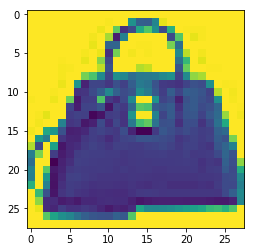

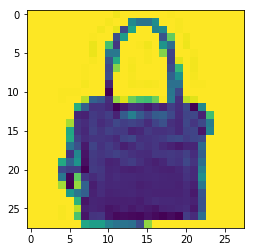

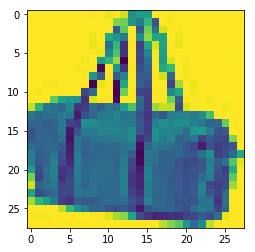

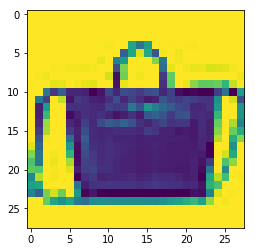

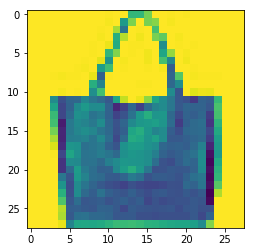

In [6]:
indexes0 = getIndexes(classes[0])
for i in indexes0:
    img = xtrain[i].reshape(28,28)
    plt.imshow(img)
    plt.show()

In [36]:
###Your code for part b

In [7]:
xtrain.shape

(47520, 784)

In [8]:
x_train = xtrain/255.   
x_test  = xtest/255.

x_train = xtrain.astype('float32')
x_test = xtest.astype('float32')

x_train = x_train.reshape(47520,28,28,1)
x_test = x_test.reshape(6480, 28, 28, 1)

In [9]:
type_dict = {247: 0, 248: 1, 249: 2, 250: 3, 251: 4, 252: 5, 253: 6, 254: 7, 255: 8}
ytrain_copy = [type_dict[item] for item in ytrain]
ytest_copy = [type_dict[item] for item in ytest]

#y_train = tf.keras.utils.to_categorical(ytrain_copy, num_classes)
#y_test = tf.keras.utils.to_categorical(ytest_copy, num_classes)

In [10]:
# 128 images in each batch
batch_size = 140
# 9 classes
num_classes = 9
# train for 20 epochs
epochs = 2

In [ ]:
### your code for part c

In [11]:
model2 = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)), 
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
adam = Adam(lr=0.0001, decay=1e-6)
model2.compile(optimizer=adam,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
history = model2.fit(x_train, ytrain_copy, batch_size=batch_size, epochs=epochs, 
                    validation_data=(x_test, ytest_copy)) #gets up to 94% accuracy

'\nhistory = model2.fit(x_train, ytrain_copy, batch_size=batch_size, epochs=epochs, \n                    validation_data=(x_test, ytest_copy)) #gets up to 94% accuracy\n'

In [ ]:
###Your code for part d

In [21]:
#using L2 Regularization
from tensorflow.keras.regularizers import l2

l2 = l2(0.010)

model_L2 = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2', 
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2',),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2',),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2',),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2',),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2',),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)), 
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
adam = Adam(lr=0.0001, decay=1e-6)
model_L2.compile(optimizer=adam,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
history = model_L2.fit(x_train, ytrain_copy, batch_size=batch_size, epochs=epochs, 
                    validation_data=(x_test, ytest_copy))

'\nhistory = model_L2.fit(x_train, ytrain_copy, batch_size=batch_size, epochs=epochs, \n                    validation_data=(x_test, ytest_copy))\n'

In [25]:
#using L1 regularization
from tensorflow.keras.regularizers import l1

l1 = l1(0.010)

model_L1 = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l1', 
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer='l1',),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l1',),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer='l1',),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l1',),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer='l1',),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)), 
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
adam = Adam(lr=0.0001, decay=1e-6)
model_L1.compile(optimizer=adam,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [27]:
history = model_L1.fit(x_train, ytrain_copy, batch_size=batch_size, epochs=epochs, 
                    validation_data=(x_test, ytest_copy))

'\nhistory = model_L1.fit(x_train, ytrain_copy, batch_size=batch_size, epochs=epochs, \n                    validation_data=(x_test, ytest_copy))\n'

In [30]:
#using Dropout Regularization
from tensorflow.keras.layers import Dropout

model_dropout = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=0.20),
    
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=0.30),
    
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=0.40),
    
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(rate=0.30),
        
        Dense(512, activation='relu'),
        Dropout(rate=0.20),
        Dense(num_classes, activation='softmax')
    ])
adam = Adam(lr=0.0001, decay=1e-6)
model_dropout.compile(optimizer=adam,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [35]:
history = model_dropout.fit(x_train, ytrain_copy, batch_size=batch_size, epochs=epochs, 
                    validation_data=(x_test, ytest_copy))

'\nhistory = model_dropout.fit(x_train, ytrain_copy, batch_size=batch_size, epochs=epochs, \n                    validation_data=(x_test, ytest_copy))\n'

In [38]:
### your code for part e
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( 
        rotation_range=10,        
        width_shift_range=0.2,    
        height_shift_range=0.2,   
        shear_range=0.2,          
        zoom_range=0.2,           
        horizontal_flip=True,
        fill_mode='nearest'       
    )
test_datagen = ImageDataGenerator()

In [41]:
# fit the data generator on training data & validate on
num_train_batches = len(x_train) // batch_size
num_train_batches += (0 if len(x_train) % batch_size == 0 else 1)

num_test_batches = len(x_test) // batch_size
num_test_batches += (0 if len(x_test) % batch_size == 0 else 1) 

In [43]:
train_generator = train_datagen.flow(x_train, ytrain_copy, 
                                         batch_size=batch_size,
                                         seed=123)
test_generator = test_datagen.flow(x_test, ytest_copy, 
                                       batch_size=batch_size,
                                       seed=123)

In [47]:
#NOT DONE WITH THIS ONE
"""
history = model2.fit_generator(train_generator,
                                  steps_per_epoch = num_train_batches, 
                                  epochs = epochs,
                                  validation_data=test_generator)
"""

'\nhistory = model2.fit_generator(train_generator,\n                                  steps_per_epoch = num_train_batches, \n                                  epochs = epochs,\n                                  validation_data=test_generator)\n'

(8 points) Q2. Try at least 2 others classical (non-neural-network) machine-learning algorithms that we covered in this class to classify the same dataset. Make sure to tune any hyper-parameters of the models and plot the accuracy as a function of the values of those parameters. Explain those plots. What accuracies do you get? Why did the accuracies increase or decrease with relation to the values of the hyper-parameters? Discussing this with the bias-variance tradeoff in mind will likely be useful. How do these compare to the accuracies you got in Q1? Explain why the accuracies are higher, lower, or similar in terms of the assumptions, strengths, and weaknesses of the classification techniques you used in Q1 and Q2. Use the same data augmentation techniques that you used in Q1c with these algorithms. Compare the change in accuracy due to augmentation that you got here and that in Q1c. Explain any differences you might find.

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=64)
clf.fit(xtrain, ytrain_copy)

KeyboardInterrupt: 

(4 points) Q3. So far, we gave you both the training set and the test set for your models. But that is not what happens in real life. In real life, you prepare your model based on the training set to evaluate it on a test set to which you will have access only at some point in the future. To simulate that situation better, we are adding this question, which is related to evaluating your algorithms in Q1 and Q2 for predicting previously unseen data. On Friday, 5/22 at 12:01am, we will send you a collection of new samples without their associated labels. Your job is to run the algorithms you created for Q1 and Q2 on this new dataset and create a CSV file with 3 columns, which includes the labels that you predicted with your 3 proposed algorithms in the following order: first column is the NN from Q1, second column is the first model from Q2, and third column is the second model from Q2. You need to upload this CSV file to Canvas as your answer to this question. 